# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib.pyplot import figure

In [5]:
dataframe = pd.read_csv('bodyPerformance 2.csv')

In [6]:
df = dataframe.iloc[:300,:]

In [7]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [8]:
df.shape

(300, 12)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [11]:
df.drop(['class'], axis = 1, inplace = True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

# Descripción de base de datos
### Mis variables de interes
* `age` : Variable numerica, explica la edad de los participantes del estudio
* `gender` : Variable categorica, explica el genero de los participantes
* `height_cm` : Variable numerica, explica la altura en centimetros de los participantes
* `weight_kg` : Variable numerica, explica el peso en kilos de los participantes
* `body fat_%` : Variable nominal, explica en porcentaje la cantidad de grasa de los porcentajes
* `systolic` : Variable numerica, explica la presion arterial cuando el corazon late de los participantes
* `gripForce` : Variable numerica, explica la fuerza de agarre que pueden ejercer con la mano los participantes
* `sit-ups counts` : Variable numerica, explica cuantas sentadillas pueden hacer los participantes
* `broad jump_cm` : Variable numerica, explica que tan lejos pueden saltar en centimetros los participantes

Esta base de datos contiene variables relacionadas con el desempeño del cuerpo, aunque no todas las variables son de interes se decidio solo eliminar la variable 'class' ya que no tenia relevancia para nuestra investigacion. La base de datos era muy extensa por lo cual solo utilizamos 300 participantes (la base de datos estaba organizada de manera aleatoria).

# Pregunta de Investigación 1
## ¿Existe una relación entre la `edad` y el `porcentaje de grasa`?¿El `genero` afecta?

Esta pregunta puede responderese con un analisis de correlacion y una grafica de regresión

Text(0.5, 1.0, 'Relación entre Edad y % de Grasa')

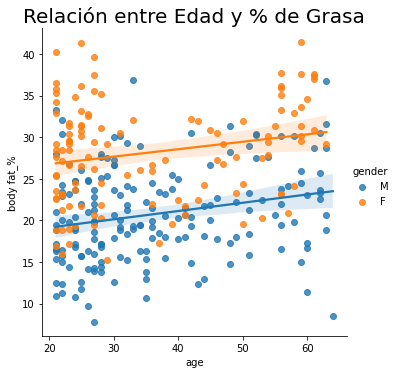

In [13]:
sns.lmplot(x = 'age',
           y = 'body fat_%',
           data = df,
           fit_reg = True,
           hue = 'gender'
          )
plt.title('Relación entre Edad y % de Grasa', fontsize = 20)

In [14]:
df.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.249959,-0.045981,0.170853,0.222009,0.239038,-0.101854,-0.087524,-0.451272,-0.317299
height_cm,-0.249959,1.000000,0.777652,-0.560913,0.110286,0.182794,0.762239,-0.281484,0.550567,0.708858
weight_kg,-0.045981,0.777652,1.000000,-0.196180,0.188573,0.292969,0.787839,-0.373399,0.412144,0.560180
body fat_%,0.170853,-0.560913,-0.196180,1.000000,0.028710,-0.019763,-0.539901,-0.082904,-0.567151,-0.661679
diastolic,0.222009,0.110286,0.188573,0.028710,1.000000,0.726283,0.219918,0.006334,0.030200,0.157662
systolic,0.239038,0.182794,0.292969,-0.019763,0.726283,1.000000,0.314203,-0.054548,0.117605,0.209478
gripForce,-0.101854,0.762239,0.787839,-0.539901,0.219918,0.314203,1.000000,-0.120950,0.631219,0.740638
sit and bend forward_cm,-0.087524,-0.281484,-0.373399,-0.082904,0.006334,-0.054548,-0.120950,1.000000,0.127529,-0.033907
sit-ups counts,-0.451272,0.550567,0.412144,-0.567151,0.030200,0.117605,0.631219,0.127529,1.000000,0.749531
broad jump_cm,-0.317299,0.708858,0.560180,-0.661679,0.157662,0.209478,0.740638,-0.033907,0.749531,1.000000


### Observaciones:
En la grafia podemos apreciar que los valores esta bastante dispersos pero existen una pequeña tendencia a incrementar el porcentaje de grasa
cuando se incrementa la edad, si revisamos el coeficiente de correlacion notamos que su valor es de 0.170853 por lo que es positivo pero muy bajo. La grafia muestra que las mujeres tienen una tendencia mas alta que los hombres.

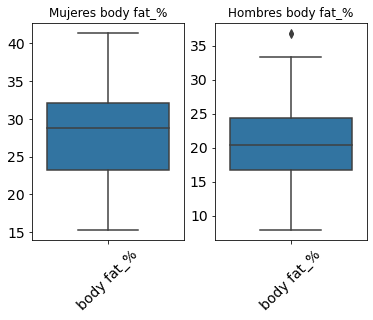

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1) # 1er renglon, 2da columna, 1st position
sns.boxplot(data = df.loc[df['gender'] == 'F',
                               ['body fat_%']
                              ]
            )
plt.xticks(fontsize = 14, rotation =45)
plt.yticks(fontsize = 14)   

ax2 = fig.add_subplot(1,2,2) # 1er renglon, 2da columna, 2nd position
sns.boxplot(data = df.loc[df['gender'] == 'M',
                               ['body fat_%']
                              ]
            )
plt.xticks(fontsize = 14, rotation =45)
plt.yticks(fontsize = 14)                           
ax1.title.set_text('Mujeres body fat_%')
ax2.title.set_text('Hombres body fat_%')

In [16]:
df['body fat_%'].describe()

count    300.000000
mean      23.741984
std        6.843330
min        7.800000
25%       18.900000
50%       23.200000
75%       29.200000
max       41.400000
Name: body fat_%, dtype: float64

In [17]:
pivota = pd.pivot_table(df,
                        values = 'body fat_%',
                        aggfunc = 'mean',
                        columns = 'gender')

In [18]:
pivota

gender,F,M
body fat_%,28.17196,20.788667


### Obseravaciones:
como se vio en la grafica del incicio la tabaja del final nos confirma que las mujeres tienen un promedio mayor en porcentaje de grasa en su cuerpo que los hombres. El de las mujeres es casi 5% mayor que el promedio general mientras que los hombres tienen un porcentaje un poco mas de 2% menor al promedio general.

## Conclusión

la relacion entre edad y % de grasa es muy baja (0.170853) por lo que consideramos que no tiene significancia.
Por el otro lado el genero si juega un factor debido a que las mujeres cuentan con un promedio mayor que los hombres.

# Pregunta de Investigación 2
## ¿Hay un genero dominante en la fuerza de agarre?

Para poder notar si existe un genero dominante podemos realizar un swarm plot en el cual se divida por genero. Ademas se podria conseguir el promedio y  una descripción de los valores para notar cual promedio de cada genero. 

Text(0.5, 1.0, 'Swarm plot de Genero vs Grip Force ')

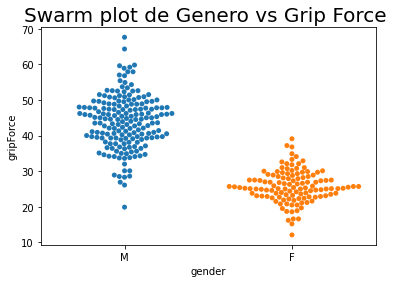

In [19]:
sns.swarmplot(x = 'gender',
              y = 'gripForce',
              data = df
             )
plt.title('Swarm plot de Genero vs Grip Force ', fontsize = 20)


### Observaciones
los valores de los hombres se ven significativamente mas altos ademas de queel mayor de las mujeres no alcanza donde se encuentra
el cumulo de los valores masculinos

In [20]:
pivota = pd.pivot_table(df,
                        values = 'gripForce',
                        aggfunc = ('mean', 'max','std','min'),
                        columns = 'gender')
pivota

gender,F,M
max,39.100000,67.600000
mean,25.734167,43.925556
min,12.100000,19.900000
std,4.479674,7.494535


## Conclusión

Los hombres si tienen una fuerza de agarre mayor, con un promedio de 43.9 a comparacion de un promedio de las mujeres de 25.7. El valor maximo de las mujeres en este rubro es de 39.1 lo cual esta por debajo del promedio masculino. 

# Pregunta de Investigación 3
## ¿La presion sistolica alta es un porblema para la gente? ¿Hay un genero que sufra más?

Se puede revisar con un histograma en que valores de 'sistol' se tiene una mayor frecuencia

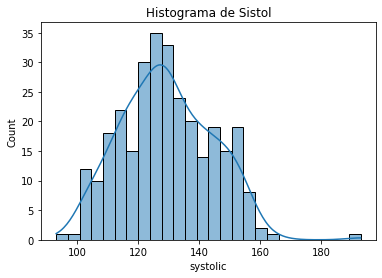

In [21]:
sns.histplot(df['systolic'], 
             kde = True,
            bins = 26).set_title("Histograma de Sistol")

plt.show()

### Observaciones
la presion sistolica normal es menor a 120, una presion sistolica arriba de 120 ya es contada como alta. en la grafica podemos apreciar que la mayoria de los valores se encuentran por encima de los 120 recomendados. 

In [22]:
count = 0
countF = 0
countM = 0
a = df['systolic']
b = df['gender']
for i in range(300):
    if a[i] > 120:
        count = count + 1
    if a[i] > 120 and b[i] == 'F':
        countF = countF + 1
    if a[i] > 120 and b[i] == 'M':
        countM = countM + 1
        
print('el total de participantes con la presion sistolica mayor a 120 son:',count,'; De los cuales',countF, 'son mujeres y', countM, 'son hombres' )

el total de participantes con la presion sistolica mayor a 120 son: 207 ; De los cuales 61 son mujeres y 146 son hombres


## Conclusión
La presion sistolica alta si es un problema para la gente, ya que aunque tener la presion por arriba 120 no es mortal es ideal lograr manterela por debajo de los 120. De las 300 personas 207 tienen presion sistolica alta, de los cuales el 70% son hombres.

# Pregunta de Investigación 4
## ¿Se puede determinar el 'peso' de una persona con el valor de su 'altura' y 'edad'?

esto puede probarse creando una regresion simple con 'peso' como la variable dependiente y 'altura' y edad' como variables independientes. Esto nos permitiria revisar la correlacion y el valor de R^2 para determinar si tiene un buen ajuste o no. 

la regresion sería:      'peso' = bo + b1(altura) + b2(edad)

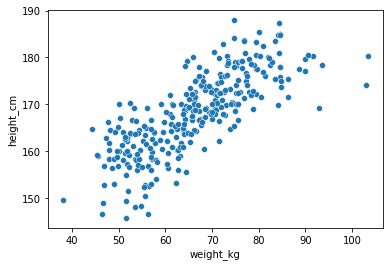

In [23]:
sns.scatterplot(x = df['weight_kg'],
               y = df['height_cm'])

plt.title = ('scatter peso vs altura')


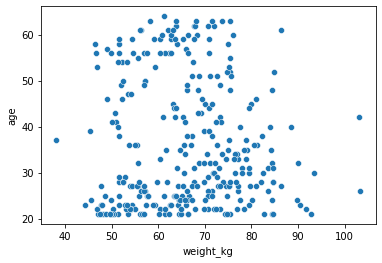

In [24]:
sns.scatterplot(x = df['weight_kg'],
               y = df['age'],
               )

plt.title = ('scatter peso vs edad')


In [25]:
modelA = sm.OLS.from_formula('weight_kg ~ height_cm + age', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              weight_kg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     250.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.53e-64
Time:                        07:26:41   Log-Likelihood:                -1009.9
No. Observations:                 300   AIC:                             2026.
Df Residuals:                     297   BIC:                             2037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.9519      8.597    -14.301      0.000    -139.871    -106.033
height_cm      1.0960      0.049     22.365      0.000       1.000       1.192
age            0.1338      0.031      4.332      0.000       0.073       0.195
==============================================================================
Omnibus:                       25.020   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.805
Skew:                           0.532   Prob(JB):                     2.27e-09
Kurtosis:                       4.433   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observaciones
se puede apreciar que el scatterplot que incluye altura tiene una regresion mas marcada que el que incluye edad.

R-cuadrado : 0.628 por lo que el 62.8% de los pesos de los participantes esta explicados por esta funcion. 

b0 : -122.9519

b1 : 1.0960

b2 : 0.1338

In [26]:
print('El peso pronosticado de una persona de 21 años con altura de 180 cm es de', -122.9519+(1.0960*180)+(0.1338*21))

El peso pronosticado de una persona de 21 años con altura de 180 cm es de 77.13790000000003


## Conclusiones
aunque el valor de la altura si tiene correlacion con el peso, nuestra regresion no nos da un R^2 muy cercano al 1 por lo cual no podemos concluir que el pronostico es el ideal. Nuestra R^2 es de 62.8% por lo que hay espacio para mejora.

# Pregunta de Investigación 5
## ¿Qué variable afecta mas la distancia de salto? la altura o la cantidad de sentadillas que puedan hacer?

esto se puede revisar en las correlaciones y porbar realizando regresiones donde se revise cual tiene un menor error

### Observaciones
la correlacion entre salto y altura es de :0.708858

la correlacion entre salto y sentadillas es de : 0.749531

In [27]:
df = df.rename(columns={'broad jump_cm':'jump', 'sit-ups counts':'situps'})

In [28]:
modelB = sm.OLS.from_formula('jump~ height_cm + situps', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   jump   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           8.85e-76
Time:                        07:26:42   Log-Likelihood:                -1346.2
No. Observations:                 300   AIC:                             2698.
Df Residuals:                     297   BIC:                             2710.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -189.4657     27.224     -6.960      0.000    -243.042    -135.889
height_cm      1.9084      0.174     10.941      0.000       1.565       2.252
situps         1.4276      0.108     13.271      0.000       1.216       1.639
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.690
Skew:                           0.058   Prob(JB):                        0.708
Kurtosis:                       3.204   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observaciones
el R^2 es de 68.8% lo cual no es ideal pero es el mejor modelo que se ha obtenido

los coeficientes son:

b0 = -189.4657

b1 = 1.9084

b2 = 1.4276

In [29]:
modelB = sm.OLS.from_formula('jump~ situps', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   jump   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     382.1
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.50e-55
Time:                        07:26:42   Log-Likelihood:                -1397.0
No. Observations:                 300   AIC:                             2798.
Df Residuals:                     298   BIC:                             2805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.4941      4.489     23.500      0.000      96.660     114.328
situps         2.0756      0.106     19.546      0.000       1.867       2.285
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.710
Skew:                           0.053   Prob(JB):                        0.701
Kurtosis:                       2.787   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

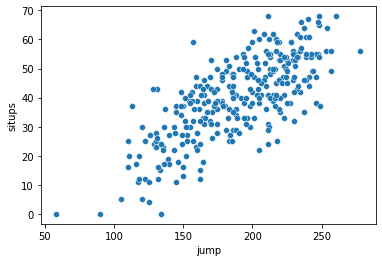

In [32]:
sns.scatterplot(x = df['jump'],
               y = df['situps'],
               )

### Observaciones
cuando solo se utiliza situps podemos ver que el R^2 disminuyo por lo que supone que es no es ideal que este solo.
la grafica de dispercion nos muestra que si existe una tendencia lineal positiva

In [30]:
modelB = sm.OLS.from_formula('jump~ height_cm', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   jump   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     301.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.34e-47
Time:                        07:26:42   Log-Likelihood:                -1416.1
No. Observations:                 300   AIC:                             2836.
Df Residuals:                     298   BIC:                             2844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -346.7208     30.883    -11.227      0.000    -407.498    -285.944
height_cm      3.1829      0.183     17.348      0.000       2.822       3.544
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.261
Skew:                          -0.071   Prob(JB):                        0.878
Kurtosis:                       3.021   Cond. No.                     3.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

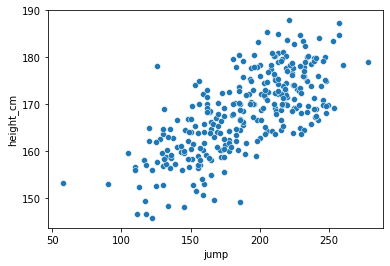

In [33]:
sns.scatterplot(x = df['jump'],
               y = df['height_cm'],
               )

### Observaciones
al igual que en el caso de situps el valor de R^2 disminuyo lo cual no es ideal, la grafica de scatterplot nos permite ver que se posee el mismo comportamiento que en el caso de las situps.

In [38]:
modelB = sm.OLS.from_formula('jump~ height_cm + situps + gripForce + weight_kg', data = df)
resultB = modelB.fit()
resultB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   jump   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     185.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.52e-79
Time:                        07:37:25   Log-Likelihood:                -1332.3
No. Observations:                 300   AIC:                             2675.
Df Residuals:                     295   BIC:                             2693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.2426     33.526     -3.557      0.000    -185.223     -53.262
height_cm      1.4689      0.248      5.918      0.000       0.980       1.957
situps         1.1462      0.116      9.854      0.000       0.917       1.375
gripForce      1.1398      0.216      5.278      0.000       0.715       1.565
weight_kg     -0.4063      0.196     -2.075      0.039      -0.792      -0.021
==============================================================================
Omnibus:                        1.460   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.225
Skew:                          -0.046   Prob(JB):                        0.542
Kurtosis:                       3.299   Cond. No.                     5.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusiones

aunque no sea un modelo ideal, la predicción del tamaño del salto puede ser calculada utilizando los valores de la altura y la cantidad de sentadillas que puede realizar una persona. No es ideal utilizar una de estas variables por separado. Un modelo mas certero (R^2 de 71.5%) seria utilizar las dos variables anteriores mas el peso del individuo y su fuerza de agarre.